In [1]:
import re
import pandas
import matplotlib.pyplot as plt
import calendar

In [2]:
def findMostUsedWord():
    d = {}
    for i in words_list:
        if i in d.keys():
            d[i] = d[i] + 1
        elif i.isalpha():
            d[i] = 1
    max = 0
    key = ''
    for k, v in d.items():
        if v > max:
            max = v
            key = k
    return key.capitalize(), max

def findTopFiveUsers():
    d = []
    for i in df_user.iterrows():
        d.append([i[1][0], i[0]])
    d.sort(reverse=True)
    top5_names = []
    top5_no_of_msgs = []
    c = 0
    for i in d:
        if i[1] != 'N/A':
            top5_no_of_msgs.append(i[0])
            top5_names.append(i[1])
            c += 1
        if c == 5: break
    return top5_no_of_msgs,top5_names


In [3]:
# Here ex2 file contains our whatsapp Chat Data
f = open('ex3.txt', encoding='utf8')
l = []
ind = -1
for i in f:
    s = i.rstrip('\n')
    r = re.match(r'[\d]{1,2}/[\d]{2}/[\d]{2}, [\d]{1,2}:[\d]{2}', s)
    if r:
        l.append(s)
        ind = ind + 1
    else:
        l[ind] = l[ind] + s

f.close()


In [4]:
data = []
words_list = []
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
               'November', 'December']
for i in l:
    a = i.strip().split(',')
    a1 = a[0]
    a2, a3, a4 = a[0].strip().split('/')
    a5 = day_names[calendar.weekday(int(a4), int(a3), int(a2))]
    a6 = a[1].strip().split('-')
    a7= a6[0].split(':')[0]
    c = a6[1].split(':')
    a8 = ''
    a9 = ''
    if len(c) >= 2 and 'changed' not in c[0]:
        a8 = c[0].strip()
        a9 = c[1]
    else:
        a8 = 'N/A'
        a9 = c[0]
    r = re.split(r'\W+', a9.lower())
    words_list.extend(r)
    a10 = len(a9)
    data.append([a1, a2, month_names[int(a3) - 1], '20' + a4, a5, a6[0], a7, a8, a9, a10])

In [5]:
df = pandas.DataFrame(data,
                      columns=['Date', 'Day', 'Month', 'Year', 'Day_Name', 'Time', 'Time_H', 'User', 'Message',
                               'MessageSize'])
print(df)

          Date Day      Month  Year  Day_Name       Time Time_H  \
0     27/09/19  27  September  2019    Friday  11:43 pm      11   
1     27/09/19  27  September  2019    Friday  11:43 pm      11   
2     27/09/19  27  September  2019    Friday  11:43 pm      11   
3     27/09/19  27  September  2019    Friday  11:43 pm      11   
4     27/09/19  27  September  2019    Friday  11:43 pm      11   
5     28/09/19  28  September  2019  Saturday   2:00 pm       2   
6     28/09/19  28  September  2019  Saturday   2:04 pm       2   
7     28/09/19  28  September  2019  Saturday   2:04 pm       2   
8     28/09/19  28  September  2019  Saturday   2:05 pm       2   
9     28/09/19  28  September  2019  Saturday   2:05 pm       2   
10    28/09/19  28  September  2019  Saturday   2:06 pm       2   
11    28/09/19  28  September  2019  Saturday   2:07 pm       2   
12    28/09/19  28  September  2019  Saturday   2:07 pm       2   
13    28/09/19  28  September  2019  Saturday   2:07 pm       

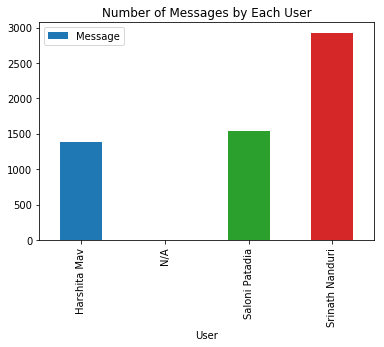

In [6]:
df_user = df.groupby(['User']).count()
#fig, ax = plt.subplots()
df_user.plot.bar(y='Message', title='Number of Messages by Each User')

#plt.show()
#fig.savefig('my_plot.png')
plt.savefig('first.png')

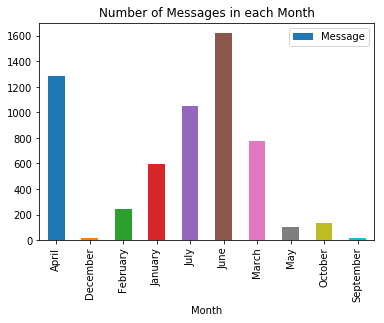

In [7]:
df_month = df.groupby(['Month']).count()
df_month.plot.bar(y='Message', title='Number of Messages in each Month')
#plt.show()
plt.savefig('second.png')

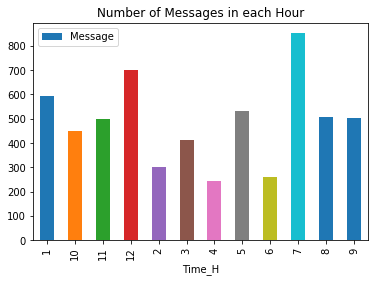

In [8]:
df_timeh = df.groupby(['Time_H']).count()
df_timeh.plot.bar(y='Message', title='Number of Messages in each Hour')
#plt.show()
plt.savefig('third.png')

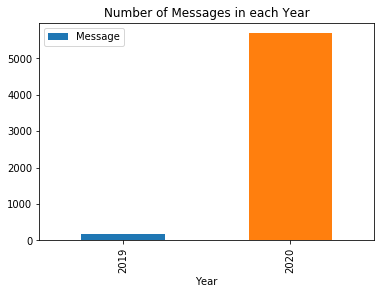

In [9]:
df_year = df.groupby(['Year']).count()
df_year.plot.bar(y='Message', title='Number of Messages in each Year')
#plt.show()
plt.savefig('fourth.png')

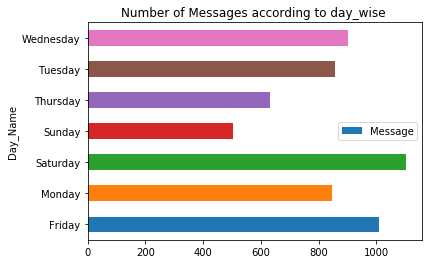

In [10]:
df_dayname = df.groupby(['Day_Name']).count()
df_dayname.plot.barh(y='Message', title='Number of Messages according to day_wise ')
#plt.show()
plt.savefig('fifth.png')

In [11]:
print('Longest Message is:', df['MessageSize'].max(), 'characters')
muw, muwt = findMostUsedWord()
if muw=="Media":
    print('Media has been sent '+ str(muwt) +' times.')
else:
    print('The Most Used Word is:' + muw + '-> used ' + str(muwt) + ' times')

Longest Message is: 237 characters
Media has been sent 425 times.


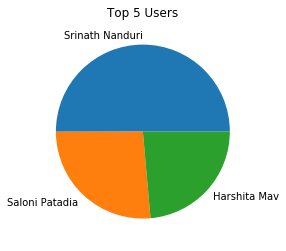

In [12]:
# for top 5 users
top5=findTopFiveUsers()
plt.pie(top5[0], labels=top5[1])
plt.title('Top 5 Users')
#plt.show()
plt.savefig('sixth.png')

In [13]:
df.to_csv('chats.csv')